Datset- STD infection rates in America

Objective-Examine the occurrences of STDs between different groups of people (e.g. men vs women, different age groups)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
#loading dataset
std=pd.read_csv('STD Cases.csv')

In [3]:
#preview of the data
std.head()

,index,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
0,0,Chlamydia,274.0,Alabama,1996.0,Male,0-14 years,0-14,25.0,468394.0,5.34
1,1,Chlamydia,274.0,Alabama,1996.0,Male,15-19 years,15-19,164.0,165920.0,98.84
2,2,Chlamydia,274.0,Alabama,1996.0,Male,20-24 years,20-24,193.0,152848.0,126.27
3,3,Chlamydia,274.0,Alabama,1996.0,Male,25-29 years,25-29,88.0,152778.0,57.60
4,4,Chlamydia,274.0,Alabama,1996.0,Male,30-34 years,30-34,55.0,155850.0,35.29


In [4]:
std.shape

(42680, 11)

In [5]:
#checking number of nulls
std.isna().sum()

index               0
Disease           150
Disease Code      150
State             150
Year              150
Gender            150
Age               150
Age Code          150
STD Cases         150
Population       7197
Rate per 100K    7197
dtype: int64

In [6]:
#decided to drop all null values in columns that arent population and rate per 100k. 

In [7]:
std=std.dropna(subset=['Disease','Disease Code','State','Year','Gender','Age','Age Code','STD Cases'])

In [8]:
std.isna().sum()

index               0
Disease             0
Disease Code        0
State               0
Year                0
Gender              0
Age                 0
Age Code            0
STD Cases           0
Population       7047
Rate per 100K    7047
dtype: int64

In [9]:
#checking data types
std.dtypes

index              int64
Disease           object
Disease Code     float64
State             object
Year             float64
Gender            object
Age               object
Age Code          object
STD Cases        float64
Population       float64
Rate per 100K    float64
dtype: object

In [10]:
#Unique values in disease column
std['Disease'].unique()

array(['Chlamydia', 'Gonorrhea', 'Primary and Secondary Syphilis'],
      dtype=object)

In [11]:
#unique values in the year column
std['Year'].unique()

array([1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014.])

In [12]:
#changing data type of std cases
std = std.astype({'STD Cases':'int'}) 

In [13]:
std.shape

(42530, 11)

In [14]:
std.groupby(['Disease']).size()

Disease
Chlamydia                         17496
Gonorrhea                         16154
Primary and Secondary Syphilis     8880
dtype: int64

In [15]:
std.describe()

,index,Disease Code,Year,STD Cases,Population,Rate per 100K
count,42530.000000,42530.000000,42530.000000,42530.000000,3.548300e+04,35483.000000
mean,21313.604162,283.795533,2005.240607,603.133647,4.389794e+05,325.661860
std,12320.345496,13.723063,5.431696,1973.091099,7.605588e+05,697.545461
min,0.000000,274.000000,1996.000000,1.000000,1.293700e+04,0.020000
25%,10632.250000,274.000000,2001.000000,8.000000,9.418100e+04,6.950000
50%,21314.500000,280.000000,2005.000000,59.000000,1.966280e+05,52.890000
75%,31996.750000,280.000000,2010.000000,380.000000,4.322250e+05,302.955000
max,42629.000000,310.000000,2014.000000,46885.000000,8.880836e+06,9078.950000


Text(0.5, 1.0, 'Prevalence of STDs in the US')

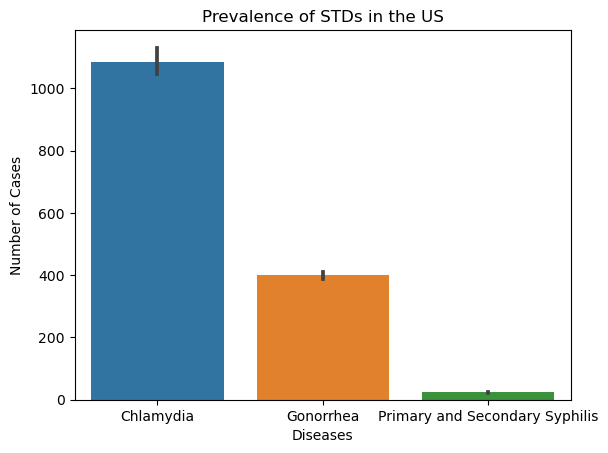

In [16]:
sns.barplot(x='Disease',y='STD Cases', data=std)
plt.xlabel('Diseases')
plt.ylabel('Number of Cases')
plt.title('Prevalence of STDs in the US')

In [17]:
disease_std = std.groupby(by="Disease")["STD Cases"].sum()

In [18]:
disease_std

Disease
Chlamydia                         18991264
Gonorrhea                          6454097
Primary and Secondary Syphilis      205913
Name: STD Cases, dtype: int64

We see that chlamydia is the most prominent in the entire dataset. 

In [19]:
disease_state=std.sort_values(['Disease','State'], ascending=False).groupby('Disease').head()

In [20]:
disease_state

,index,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
19445,19445,Primary and Secondary Syphilis,310.0,Wyoming,1996.0,Male,40+ years,40+,1,97573.0,1.02
19446,19446,Primary and Secondary Syphilis,310.0,Wyoming,1998.0,Male,40+ years,40+,1,102238.0,0.98
19447,19447,Primary and Secondary Syphilis,310.0,Wyoming,2004.0,Male,25-29 years,25-29,1,16327.0,6.12
19448,19448,Primary and Secondary Syphilis,310.0,Wyoming,2004.0,Male,30-34 years,30-34,1,15565.0,6.42
19449,19449,Primary and Secondary Syphilis,310.0,Wyoming,2007.0,Male,25-29 years,25-29,1,20326.0,4.92
14494,14494,Gonorrhea,280.0,Wyoming,1996.0,Male,15-19 years,15-19,3,21838.0,13.74
14495,14495,Gonorrhea,280.0,Wyoming,1996.0,Male,20-24 years,20-24,4,16960.0,23.58
14496,14496,Gonorrhea,280.0,Wyoming,1996.0,Male,25-29 years,25-29,3,14000.0,21.43
14497,14497,Gonorrhea,280.0,Wyoming,1996.0,Male,30-34 years,30-34,2,16971.0,11.78
14498,14498,Gonorrhea,280.0,Wyoming,1996.0,Male,35-39 years,35-39,1,21612.0,4.63


# STDs by State/Population

In [21]:
#sorting the number of stds by state (ascending)
state_std = std.groupby('State')['STD Cases'].sum().sort_values(ascending=True)

In [22]:
state_std

State
Vermont                   21516
Wyoming                   26315
North Dakota              37255
New Hampshire             39142
Maine                     44519
Montana                   51032
South Dakota              57064
Idaho                     63938
Rhode Island              71244
West Virginia             76505
Alaska                    89281
Delaware                  91231
Utah                      99020
Hawaii                   106856
Nebraska                 119633
District of Columbia     140146
Nevada                   180075
Iowa                     180350
New Mexico               185112
Kansas                   197425
Oregon                   205212
Connecticut              248788
Arkansas                 270043
Kentucky                 278059
Minnesota                289849
Oklahoma                 330536
Massachusetts            335397
Colorado                 351654
Washington               397864
Mississippi              459699
Wisconsin                463874
Ar

There are the most STD cases in California, Texas, New York, and Florida but it is important to note that these states have high populations. 

In [23]:
#summing the populations for each state and year
pop_sum = std.groupby(['State', 'Year'])['Population'].sum()
print(pop_sum)

State    Year  
Alabama  1996.0    12993306.0
         1997.0    13103805.0
         1998.0    12741738.0
         1999.0    13290423.0
         2000.0    12435667.0
                      ...    
Wyoming  2010.0      865626.0
         2011.0     1003464.0
         2012.0     1098741.0
         2013.0      878613.0
         2014.0     1228758.0
Name: Population, Length: 969, dtype: float64


In [24]:
#Finding the avg population
meanpop = pop_sum.groupby('State').mean().sort_values(ascending=True)
print(meanpop)

State
Wyoming                 9.495032e+05
Vermont                 1.150330e+06
North Dakota            1.274749e+06
Alaska                  1.437952e+06
District of Columbia    1.625036e+06
South Dakota            1.669525e+06
Montana                 1.883489e+06
Delaware                2.057212e+06
Rhode Island            2.527935e+06
Maine                   2.674093e+06
New Hampshire           2.737624e+06
Hawaii                  2.993198e+06
Idaho                   3.153115e+06
Nebraska                4.200423e+06
West Virginia           4.230443e+06
New Mexico              5.083344e+06
Utah                    5.704904e+06
Nevada                  6.142294e+06
Kansas                  7.220248e+06
Iowa                    7.408534e+06
Arkansas                7.899539e+06
Mississippi             8.261492e+06
Oregon                  8.950125e+06
Connecticut             9.046417e+06
Oklahoma                9.857712e+06
Kentucky                1.149665e+07
Colorado                1.205778

In [25]:
average = state_std/(meanpop)

In [26]:
avg_sort=average.sort_values(ascending=False)

In [27]:
print(avg_sort)

State
District of Columbia    0.086242
Alaska                  0.062089
Mississippi             0.055644
South Carolina          0.047446
Louisiana               0.046519
Delaware                0.044347
Alabama                 0.043223
Georgia                 0.041172
Illinois                0.037212
North Carolina          0.037048
New Mexico              0.036415
Hawaii                  0.035700
Tennessee               0.035465
Michigan                0.034827
Ohio                    0.034486
Maryland                0.034430
Missouri                0.034235
Arkansas                0.034185
South Dakota            0.034180
Oklahoma                0.033531
Texas                   0.033216
New York                0.031112
Wisconsin               0.030905
Nevada                  0.029317
Arizona                 0.029284
Virginia                0.029280
North Dakota            0.029225
Colorado                0.029164
Indiana                 0.028771
Nebraska                0.028481
Cali

After finding the average population and the number of cases per state, we see that D.C. has the highest rate of STDs with Alaska, Mississippi, and South Carolina following. 

# STDs by Year

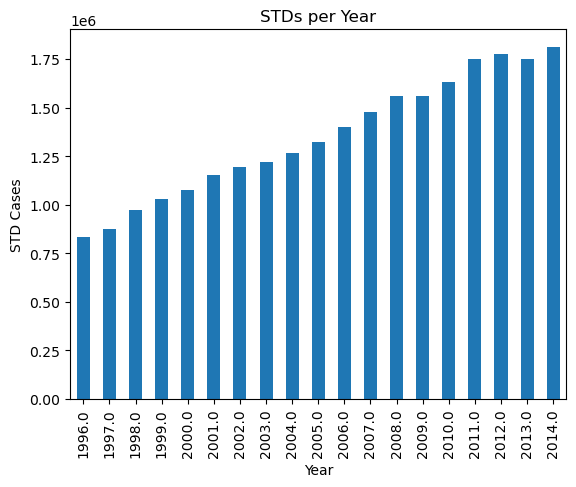

In [28]:
#Grouping the data by year and sum of std cases 
std_year = std.groupby('Year')['STD Cases'].sum()

# Plotting
std_year.plot(kind='bar')
plt.title('STDs per Year')
plt.xlabel('Year')
plt.ylabel('STD Cases')
plt.show()

Number of STDs is increasing by the year most years. 

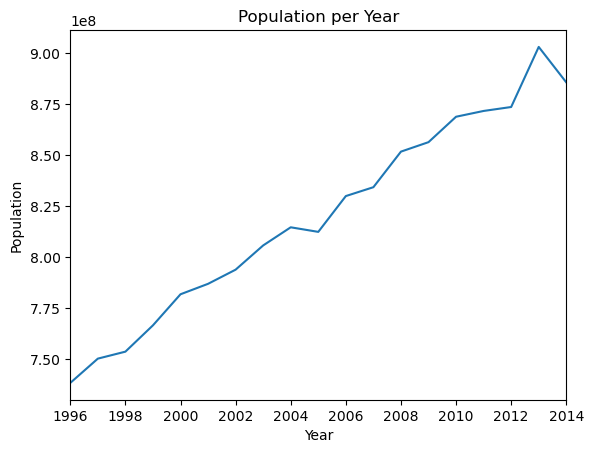

In [29]:
# Group the data
year_pop = std.groupby('Year')['Population'].sum()

# Plotting
year_pop.plot()
plt.title('Population per Year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xlim(left=1996, right=2014)
plt.show()

The popuation also appears to be increasing most years. 

In [30]:
#Finding rate of stds per year change
std_year_rate=std_year.pct_change()
print(std_year_rate)

Year
1996.0         NaN
1997.0    0.050146
1998.0    0.113085
1999.0    0.059536
2000.0    0.046753
2001.0    0.068109
2002.0    0.036678
2003.0    0.022258
2004.0    0.039200
2005.0    0.045116
2006.0    0.056064
2007.0    0.054894
2008.0    0.057550
2009.0   -0.000906
2010.0    0.045953
2011.0    0.072104
2012.0    0.014216
2013.0   -0.011945
2014.0    0.033993
Name: STD Cases, dtype: float64


In [31]:
#Finding rate of population change each year
year_pop_rate = year_pop.pct_change()
print(year_pop_rate)

Year
1996.0         NaN
1997.0    0.016132
1998.0    0.004564
1999.0    0.017121
2000.0    0.019879
2001.0    0.006551
2002.0    0.008823
2003.0    0.014968
2004.0    0.011039
2005.0   -0.002754
2006.0    0.021615
2007.0    0.005237
2008.0    0.020912
2009.0    0.005450
2010.0    0.014558
2011.0    0.003265
2012.0    0.002221
2013.0    0.033727
2014.0   -0.019252
Name: Population, dtype: float64


We can see that the rate of number of STDs per year increased every year except 2009 and 2013. From the graphs above, we were able to see that the population and the number of STDs were both steadily increasing over the years, but finding the change in rates allowed us to see that the number of STDs increased at a higher rate for the majority of the years. To me, this indicates that the STD rate is not naturally incrasing with the population even though that is what could have been suggested from just seeing the graphs. 

In [32]:
#Finding number of STDs per year by type of STD
year_std= std.groupby(['Year','Disease'])['STD Cases'].sum()
unstacked1=year_std.unstack()
print(unstacked1)

Disease  Chlamydia  Gonorrhea  Primary and Secondary Syphilis
Year                                                         
1996.0      492084     327723                           11414
1997.0      537384     326971                            8548
1998.0      608490     356107                            7018
1999.0      662250     360598                            6613
2000.0      708698     362920                            5973
2001.0      783127     361758                            6100
2002.0      834503     351836                            6862
2003.0      877478     335104                            7177
2004.0      929462     330132                            7980
2005.0      976445     339593                            8724
2006.0     1030911     358366                            9756
2007.0     1108374     355991                           11466
2008.0     1210523     336742                           13500
2009.0     1244180     301174                           13997
2010.0  

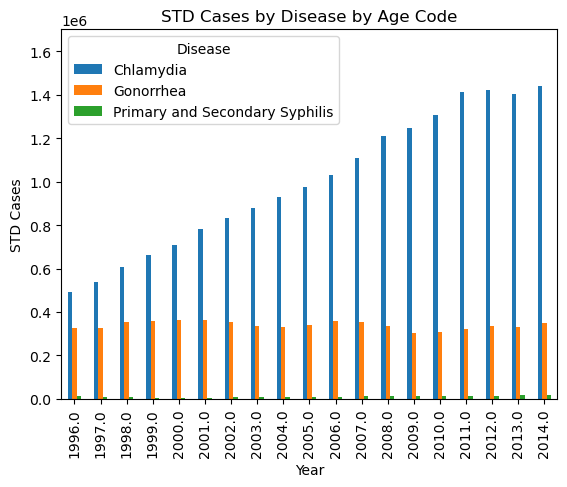

In [33]:
unstacked1.plot(kind='bar')
plt.title('STD Cases by Disease by Age Code')
plt.xlabel('Year')
plt.ylabel('STD Cases')
plt.ylim(0, 1700000)
plt.show()

# STDs by Age Group

In [34]:
#Grouping number of STDs by Age Group
age_std = std.groupby('Age Code')['STD Cases'].sum()
print(age_std)

Age Code
0-14      390379
15-19    8167549
20-24    9072165
25-29    3953879
30-34    1810217
35-39     953043
40+      1139728
99        164314
Name: STD Cases, dtype: int64


In [35]:
#Finding number of STDs per year by type of STD
age_std2= std.groupby(['Age Code','Disease'])['STD Cases'].sum()
unstacked2=age_std2.unstack()
print(unstacked2)

Disease   Chlamydia  Gonorrhea  Primary and Secondary Syphilis
Age Code                                                      
0-14         294019      95879                             481
15-19       6408981    1745515                           13053
20-24       6989018    2046909                           36238
25-29       2855315    1063854                           34710
30-34       1198867     581309                           30041
35-39        560255     364207                           28581
40+          565947     511122                           62659
99           118862      45302                             150


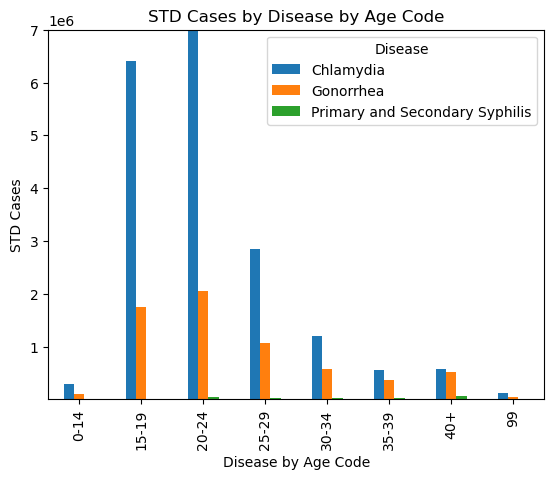

In [36]:
unstacked2.plot(kind='bar')
plt.title('STD Cases by Disease by Age Code')
plt.xlabel('Disease by Age Code')
plt.ylabel('STD Cases')
plt.ylim(100, 7000000)
plt.show()

It is interesting that there is almost the same amount of Chlamydia and Gonorrhea in the 40+ age group. This group also has the highest number of syphilis cases of any group. The 20-24 age roup has the highest number of Chlamydia and Gonorrhea. 

# Gender

In [37]:
#Grouping number of STDs by Gender
gender_std = std.groupby('Gender')['STD Cases'].sum()
print(gender_std)

Gender
Female     17639920
Male        7956030
Unknown       55324
Name: STD Cases, dtype: int64


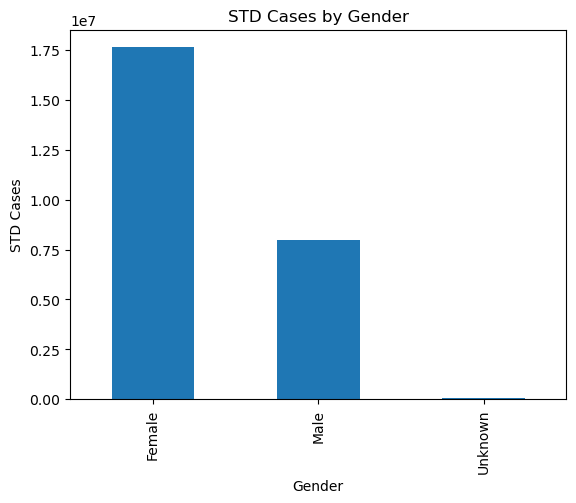

In [38]:
#plotting
gender_std.plot(kind='bar')
plt.title('STD Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('STD Cases')
plt.show()

There are more women than men in this population that have had STDs.

In [39]:
#Finding number of STDs per year by type of STD
gender2= std.groupby(['Gender','Disease'])['STD Cases'].sum()
unstacked3=gender2.unstack()
print(unstacked3)

Disease  Chlamydia  Gonorrhea  Primary and Secondary Syphilis
Gender                                                       
Female    14289879    3309364                           40677
Male       4658719    3132181                          165130
Unknown      42666      12552                             106


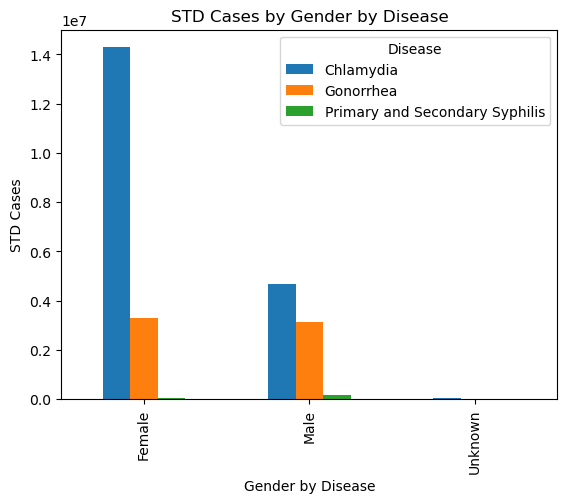

In [40]:
unstacked3.plot(kind='bar')
plt.title('STD Cases by Gender by Disease')
plt.xlabel('Gender by Disease')
plt.ylabel('STD Cases')
plt.show()

There is almost the same number of gonorrhea cases between males and females. There are 4 times more Syphilis cases in males than females. 

The reasoning for the differences in occurances between males and females is unknown. 